In [80]:
import numpy as np
import math 
import matplotlib.pyplot as plt
%matplotlib inline

#Configurable parameters for pure pursuit
+ How fast do you want the robot to move? It is fixed at $v_{max}$ in this exercise
+ When can we declare the goal has been reached?
+ What is the lookahead distance? Determines the next position on the reference path that we want the vehicle to catch up to

In [20]:
vmax = 0.75
goal_threshold = 0.05
lookahead = 3.0

In [21]:
#You know what to do!
def simulate_unicycle(pose, v,w, dt=0.1):
    x, y, t = pose
    return x + v*np.cos(t)*dt, y + v*np.sin(t)*dt, t+w*dt

In [76]:
class PurePursuitTracker(object):
    def __init__(self, x, y, v, lookahead = 3.0):
        """
        Tracks the path defined by x, y at velocity v
        x and y must be numpy arrays
        v and lookahead are floats
        """
        self.length = len(x)
        self.ref_idx = 0 #index on the path that tracker is to track
        self.lookahead = lookahead
        self.x, self.y = x, y
        self.v, self.w = v, 0

    def update(self, xc, yc, theta):
        """
        Input: xc, yc, theta - current pose of the robot
        Update v, w based on current pose
        Returns True if trajectory is over.
        """
        
        #Calculate ref_x, ref_y using current ref_idx
        #Check if we reached the end of path, then return TRUE
        #Two conditions must satisfy
        #1. ref_idx exceeds length of traj
        #2. ref_x, ref_y must be within goal_threshold
        # Write your code to check end condition
        ref_x, ref_y = self.x[self.ref_idx], self.y[self.ref_idx]
        goal_x, goal_y = self.x[-1], self.y[-1]
        if (self.ref_idx > self.length) and \
            (np.linalg.norm([ref_x-goal_x, ref_y-goal_y])) < goal_threshold:
              return True
        
        #End of path has not been reached
        #update ref_idx using np.hypot([ref_x-xc, ref_y-yc]) < lookahead
        if math.sqrt(((ref_x-xc) ** 2 + (ref_y-yc) **2)) < lookahead:
          self.ref_idx = self.ref_idx + 1
        print(self.ref_idx)
        #Find the anchor point
        # this is the line we drew between (0, 0) and (x, y)
        anchor = np.asarray([ref_x - xc, ref_y - yc])
        #Remember right now this is drawn from current robot pose
        #we have to rotate the anchor to (0, 0, pi/2)
        #code is given below for this
        theta = np.pi/2 - theta
        rot = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        anchor = np.dot(rot, anchor)
        
        L = math.sqrt((anchor[0] ** 2 + anchor[1] **2)) # dist to reference path
        X = anchor[0] #cross-track error
        #from the derivation in notes, plug in the formula for omega
        self.w = -((2*v)/(L**2))*X
        
        return False

## Visualize given trajectory

In [77]:
x = np.arange(0, 50, 0.5)
y = [np.sin(idx / 5.0) * idx / 2.0 for idx in x]


## Run the tracker simulation

1. Instantiate the tracker class
2. Initialize some starting pose
3. Simulate robot motion 1 step at a time - get $v$, $\omega$ from tracker, predict new pose using $v$, $\omega$, current pose in simulate_unicycle()
4. Stop simulation if tracker declares that end-of-path is reached
5. Record all parameters

In [78]:
#write code to instantiate the tracker class
v = 1
tracker = PurePursuitTracker(x,y,v) 
pose = -1, 0, np.pi/2 #arbitrary initial pose
x0,y0,t0 = pose # record it for plotting
traj =[]
while True:
    #write the usual code to obtain successive poses
    pose = simulate_unicycle(pose, tracker.v, tracker.w)
    if tracker.update(*pose):
        print("ARRIVED!!")    
        break
    traj.append([*pose, tracker.w, tracker.ref_idx])

1
2
3
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
18
18
18
18
18
19
19
19
19
19
20
20
20
20
20
21
21
21
21
21
22
22
22
22
23
23
23
23
23
24
24
24
24
24
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
45
45
45
45
45
45
45
46
46
46
46
46
46
46
47
47
47
47
47
47
48
48
48
48
48
49
49
49
49
50
50
50
50
51
51
51
51
51
52
52
52
52
53
53
53
53
53
53
54
54
54
54
54
54
5

IndexError: ignored

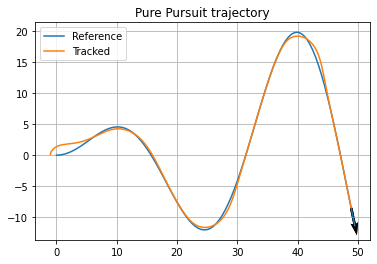

In [81]:
xs,ys,ts,ws,ids = zip(*traj)
plt.figure()
plt.plot(x,y,label='Reference')
plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
plt.plot(xs,ys,label='Tracked')
x0,y0,t0 = pose
plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
plt.title('Pure Pursuit trajectory')
plt.legend()
plt.grid()

# Visualize curvature

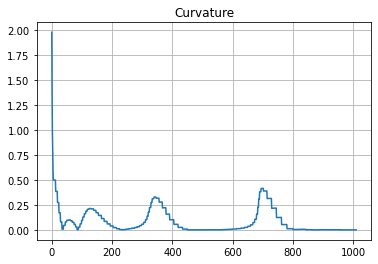

In [82]:
plt.figure()
plt.title('Curvature')
plt.plot(np.abs(ws))
plt.grid()


## Animate

Make a video to plot the current pose of the robot and reference pose it is trying to track. You can use funcAnimation in matplotlib

## Effect of noise in simulations

What happens if you add a bit of Gaussian noise to the simulate_unicycle() output? Is the tracker still robust?

The noise signifies that $v$, $\omega$ commands did not get realized exactly


In [ ]:
#You know what to do!
def simulate_unicycle(pose, v,w, dt=0.1):
    x, y, t = pose
    return x + v*np.cos(t)*dt, y + v*np.sin(t)*dt, t+w*dt